In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from src.classes.PreProcess import PreProcess

from src.constants.path import LAB_3_ROOT

[nltk_data] Downloading package punkt to
[nltk_data]     /home/fernandofincatti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/fernandofincatti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#df = pd.read_csv(f"{LAB_3_ROOT}/src/data/IMDB.csv")

In [3]:
#df.head()

In [4]:
#binary_mapping = {"positive": 1, "negative": 0}
#df["label"] = df["sentiment"].map(binary_mapping)

## Pre process

In [5]:
#pre_process = PreProcess()

In [6]:
#df["review_preprocessed"] = df["review"].apply(lambda text: pre_process.apply(text))

In [7]:
#df.to_csv("./df_preprocessed.csv")

## Applying TF-IDF

In [8]:
df = pd.read_csv(f"df_preprocessed.csv")

In [9]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression()) 
])

In [10]:
param_grid = {
    'tfidf__max_features': [100],
    'classifier__C': [0.1, 0.2, 0.4, 0.8, 1, 4, 16, 64, 256],
}

In [11]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df["review_preprocessed"],
    df["label"],
    test_size=0.25,
    random_state=42
)

In [13]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 0.2, 0.4, 0.8, 1, 4, 16, 64,
                                           256],
                         'tfidf__max_features': [100]})

In [14]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'classifier__C': 64, 'tfidf__max_features': 100}
Best score:  0.7312533333333333


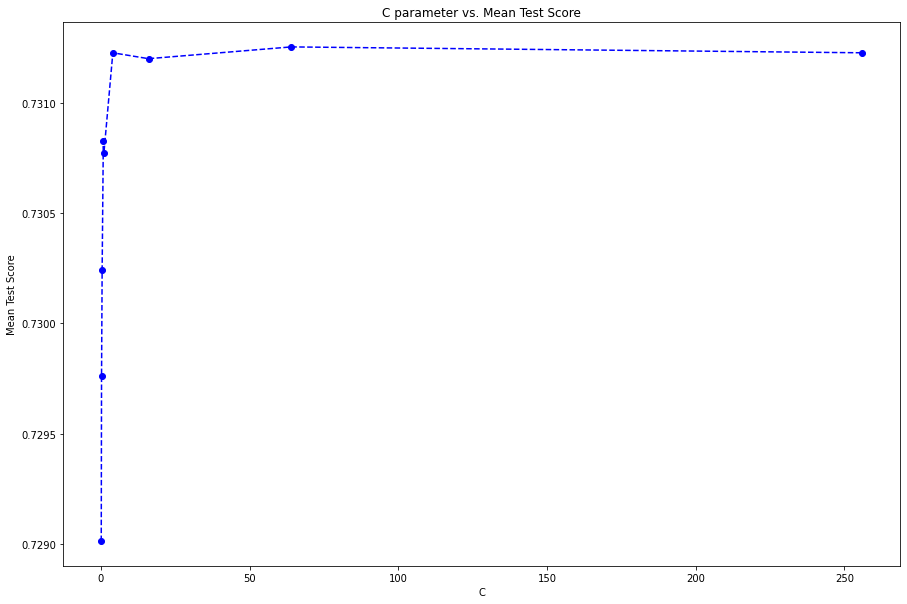

In [15]:
x = [0.1, 0.2, 0.4, 0.8, 1, 4, 16, 64, 256]
y = grid_search.cv_results_['mean_test_score']

#set marker in the point
plt.figure(figsize=(15, 10))
plt.plot(x, y, marker='o', linestyle='--', color='b')
plt.title("C parameter vs. Mean Test Score")
plt.xlabel("C")
plt.ylabel("Mean Test Score")
plt.show()

In [22]:
param_grid = {
    'tfidf__max_features': [100, 1000, 10000, 100000],
    'classifier__C': [0.1, 0.2, 0.4, 0.8, 1, 2, 4, 8, 16, 32, 64, 128, 256],
}

In [23]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df["review_preprocessed"],
    df["label"],
    test_size=0.25,
    random_state=42
)

In [25]:
grid_search.fit(X_train, Y_train)

/home/fernandofincatti/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fernandofincatti/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 0.2, 0.4, 0.8, 1, 2, 4, 8, 16,
                                           32, 64, 128, 256],
                         'tfidf__max_features': [100, 1000, 10000, 100000]})

In [26]:
x = [c_value["classifier__C"] for c_value in grid_search.cv_results_["params"]]
y = [c_value["tfidf__max_features"] for c_value in grid_search.cv_results_["params"]]
z = grid_search.cv_results_['mean_test_score']

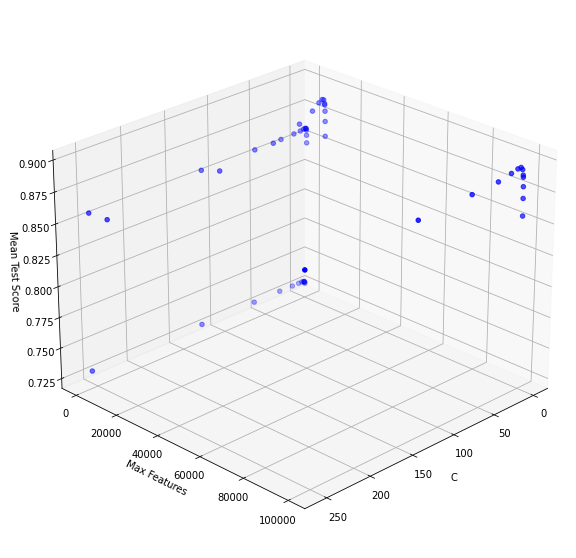

In [27]:
#plot interactive 3d graph
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o', color='b')
ax.set_xlabel('C')
ax.set_ylabel('Max Features')
ax.set_zlabel('Mean Test Score')
ax.view_init(25, 45)
plt.show()